In [166]:
import pandas as pd

import numpy as np

pd.set_option ('display.max_columns', 200)

In [167]:
df = pd.read_csv ('airline_accidents.csv.zip', low_memory=False)



df.info()

df.columns.tolist()

df.head()





<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150959 entries, 0 to 150958
Data columns (total 31 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   Event Id                 150959 non-null  object
 1   Investigation Type       150959 non-null  object
 2   Accident Number          150959 non-null  object
 3   Event Date               150959 non-null  object
 4   Location                 150959 non-null  object
 5   Country                  150959 non-null  object
 6   Latitude                 150959 non-null  object
 7   Longitude                150959 non-null  object
 8   Airport Code             150959 non-null  object
 9   Airport Name             150959 non-null  object
 10  Injury Severity          150959 non-null  object
 11  Aircraft Damage          150959 non-null  object
 12  Aircraft Category        150959 non-null  object
 13  Registration Number      150959 non-null  object
 14  Make                

,Event Id,Investigation Type,Accident Number,Event Date,Location,Country,Latitude,Longitude,Airport Code,Airport Name,Injury Severity,Aircraft Damage,Aircraft Category,Registration Number,Make,Model,Amateur Built,Number of Engines,Engine Type,FAR Description,Schedule,Purpose of Flight,Air Carrier,Total Fatal Injuries,Total Serious Injuries,Total Minor Injuries,Total Uninjured,Weather Condition,Broad Phase of Flight,Report Publication Date,Unnamed: 30
0,20080125X00106,Accident,SEA08CA056,12/31/2007,"Santa Ana, CA",United States,33.675556,-117.868056,SNA,John Wayne - Orange County,Non-Fatal,Substantial,Airplane,N2800D,Piper,PA-12,No,1,Reciprocating,Part 91: General Aviation,,Instructional,,,,,2,VMC,LANDING,02/28/2008,
1,20080206X00141,Accident,CHI08WA075,12/31/2007,"Guernsey, United Kingdom",United Kingdom,49.435000,-2.600278,,,Non-Fatal,Minor,,,Cessna,T303,No,,,,,Unknown,,,,,1,,,02/06/2008,
2,20080129X00122,Accident,CHI08CA057,12/30/2007,"Alexandria, MN",United States,45.866111,-95.394444,AXN,Chandler Field Airport,Non-Fatal,Substantial,Airplane,N5093F,Lerohl,RV-8,Yes,1,Reciprocating,Part 91: General Aviation,,Personal,,,,,1,VMC,TAKEOFF,02/28/2008,
3,20080114X00045,Accident,LAX08FA043,12/30/2007,"Paso Robles, CA",United States,35.542222,-120.522778,PRB,Paso Robles Airport,Fatal(1),Substantial,Airplane,N254SR,Cirrus Design Corp.,SR22,No,1,Reciprocating,Part 91: General Aviation,,Personal,,1,,,,VMC,MANEUVERING,06/20/2014,
4,20080109X00032,Accident,NYC08FA071,12/30/2007,"Cherokee, AL",United States,34.688611,-87.920000,,,Fatal(3),Substantial,Helicopter,N109AE,BELL,206L-3,No,1,Turbo Shaft,Part 91: General Aviation,,Other Work Use,,3,0,0,0,VMC,MANEUVERING,01/15/2009,


In [168]:
# parse the date column

df['event_date'] = pd.to_datetime(df['Event Date'], errors= 'coerce')

# creating year column

df['year'] = df['event_date'].dt.year

# cleaning make and model column names

df['Aircraft_Model'] = df['Model'].fillna('unknown').str.strip().str.upper

df['Aircraft_Make'] = df['Make'].fillna('unknown').str.strip().str.upper


# checking on missing values

df.isna().sum().sort_values(ascending = False).head(10)

,0
year,7
event_date,7
Event Id,0
Accident Number,0
Investigation Type,0
Event Date,0
Location,0
Longitude,0
Airport Code,0
Country,0


In [169]:
#standardising column names

df.columns = df.columns.str.strip()

# Converting numeric columns

num_cols = ['Total Fatal Injuries', 'Total Serious Injuries', 'Total Minor Injuries', 'Aircraft Damage']

#update to match the csv columns

for c in num_cols:
  if c in df.columns:
    df[c] = pd.to_numeric(df[c],
errors='coerce').fillna(0)
print(f"Warning: Column '{c}' not found in the DataFrame")

#Showing the clean output

print("\nFirst 10 rows of the cleaned numeric columns:")

print(df[num_cols].head(10))

print("\nData types after conversion:")

print(df[num_cols].dtypes)



First 10 rows of the cleaned numeric columns:
   Total Fatal Injuries  Total Serious Injuries  Total Minor Injuries  \
0                   0.0                     0.0                   0.0   
1                   0.0                     0.0                   0.0   
2                   0.0                     0.0                   0.0   
3                   1.0                     0.0                   0.0   
4                   3.0                     0.0                   0.0   
5                   0.0                     0.0                   0.0   
6                   0.0                     0.0                   0.0   
7                   0.0                     0.0                   0.0   
8                   1.0                     1.0                   2.0   
9                   2.0                     0.0                   0.0   

   Aircraft Damage  
0              0.0  
1              0.0  
2              0.0  
3              0.0  
4              0.0  
5              0.0  
6 

In [170]:
# removing duplicates

df = df.drop_duplicates()

# filtering recent years (2000 to 2023)

df_recent = df[(df['year'] >= 2000) & (df['year'] <= 2023)].copy()

print("Recent data (2000-2023) - First 10 rows:")

print(df_recent.head(10))

Recent data (2000-2023) - First 10 rows:
          Event Id Investigation Type Accident Number    Event Date  \
0  20080125X00106           Accident      SEA08CA056    12/31/2007    
1  20080206X00141           Accident      CHI08WA075    12/31/2007    
2  20080129X00122           Accident      CHI08CA057    12/30/2007    
3  20080114X00045           Accident      LAX08FA043    12/30/2007    
4  20080109X00032           Accident      NYC08FA071    12/30/2007    
5  20080129X00118           Accident      DEN08CA045    12/29/2007    
6  20080214X00193           Accident      CHI08CA056    12/29/2007    
7  20080215X00200           Accident      CHI08CA058    12/29/2007    
8  20071231X02014           Accident      DFW08FA053    12/29/2007    
9  20080103X00010           Accident      DFW08LA052    12/29/2007    

                     Location           Country     Latitude      Longitude  \
0              Santa Ana, CA     United States    33.675556    -117.868056    
1   Guernsey, Unite

In [171]:
# ensuring that numeric columns are present

df_recent['fatalities'] = df_recent.get('Total Fatal Injuries', 0)

df_recent['serious'] = df_recent.get('Total Serious Injuries', 0)

df_recent['damage_score'] = df_recent.get('damage_score')


w_f, w_s, w_d = 0.5, 0.2, 0.3

df_recent['incident_risk'] = (w_f * df_recent['fatalities'] +
                              w_s * df_recent['serious'] +
                              w_d * df_recent['damage_score'])
cols_to_show = [
    'Event Id', 'Event Date', 'year', 'fatalities', 'serious', 'damage_score', 'incident_risk'

]

print("First 10 rows with the new risk score:")

print(df_recent[cols_to_show].head(10))




First 10 rows with the new risk score:
          Event Id    Event Date    year  fatalities  serious damage_score  \
0  20080125X00106    12/31/2007   2007.0         0.0      0.0         None   
1  20080206X00141    12/31/2007   2007.0         0.0      0.0         None   
2  20080129X00122    12/30/2007   2007.0         0.0      0.0         None   
3  20080114X00045    12/30/2007   2007.0         1.0      0.0         None   
4  20080109X00032    12/30/2007   2007.0         3.0      0.0         None   
5  20080129X00118    12/29/2007   2007.0         0.0      0.0         None   
6  20080214X00193    12/29/2007   2007.0         0.0      0.0         None   
7  20080215X00200    12/29/2007   2007.0         0.0      0.0         None   
8  20071231X02014    12/29/2007   2007.0         1.0      1.0         None   
9  20080103X00010    12/29/2007   2007.0         2.0      0.0         None   

  incident_risk  
0           NaN  
1           NaN  
2           NaN  
3           NaN  
4           

In [172]:
# aggregate by model

agg = df_recent.groupby(['Aircraft_Make', 'Aircraft_Model']).agg(
    incidents = ('incident_risk', 'count'),
    total_risk_sum = ('incident_risk', 'sum'),
    mean_risk = ('incident_risk', 'mean'),
    total_fatalities = ('fatalities', 'sum'),
    total_serious = ('serious', 'sum')
).reset_index()

print("\nAggregated by Aircraft Make & Model - Top 10:")

print(agg.head(10))

print("\nTop 5 riskiest models:")

print(agg.sort_values('total_risk_sum', ascending = False).head(5))


Aggregated by Aircraft Make & Model - Top 10:
                                       Aircraft_Make  \
0  <bound method StringMethods.upper of <pandas.c...   

                                      Aircraft_Model  incidents  \
0  <bound method StringMethods.upper of <pandas.c...          0   

  total_risk_sum mean_risk  total_fatalities  total_serious  
0              0       NaN           11725.0         3596.0  

Top 5 riskiest models:
                                       Aircraft_Make  \
0  <bound method StringMethods.upper of <pandas.c...   

                                      Aircraft_Model  incidents  \
0  <bound method StringMethods.upper of <pandas.c...          0   

  total_risk_sum mean_risk  total_fatalities  total_serious  
0              0       NaN           11725.0         3596.0  


In [173]:
# calculating range
data_range = agg['total_risk_sum'].max() - agg['total_risk_sum'].min()

if data_range == 0:
  agg['risk_score_norm'] = 0.0

else:
  agg['risk_score_norm'] = (agg['total_risk_sum'] - agg['total_risk_sum'].min()) / data_range

agg['risk_score_pct'] = agg['risk_score_norm'] * 100

agg = agg.sort_values('risk_score_pct')

agg.head(20)



,Aircraft_Make,Aircraft_Model,incidents,total_risk_sum,mean_risk,total_fatalities,total_serious,risk_score_norm,risk_score_pct
0,<bound method StringMethods.upper of <pandas.c...,<bound method StringMethods.upper of <pandas.c...,0,0,NaN,11725.0,3596.0,0.0,0.0


In [174]:
# selecting the lowest risk models

min_incidents = 5

candidates = agg[agg['incidents'] >= min_incidents]

safest = candidates.sort_values('risk_score_pct').head(20)


cols = ['Aircraft_Make', 'Aircraft_Model', 'incidents', 'risk_score_pct', 'total_fatalities', 'total_serious']

print("safest aircraft models (>= incidents)")

print(safest[cols].round(2))

safest aircraft models (>= incidents)
Empty DataFrame
Columns: [Aircraft_Make, Aircraft_Model, incidents, risk_score_pct, total_fatalities, total_serious]
Index: []


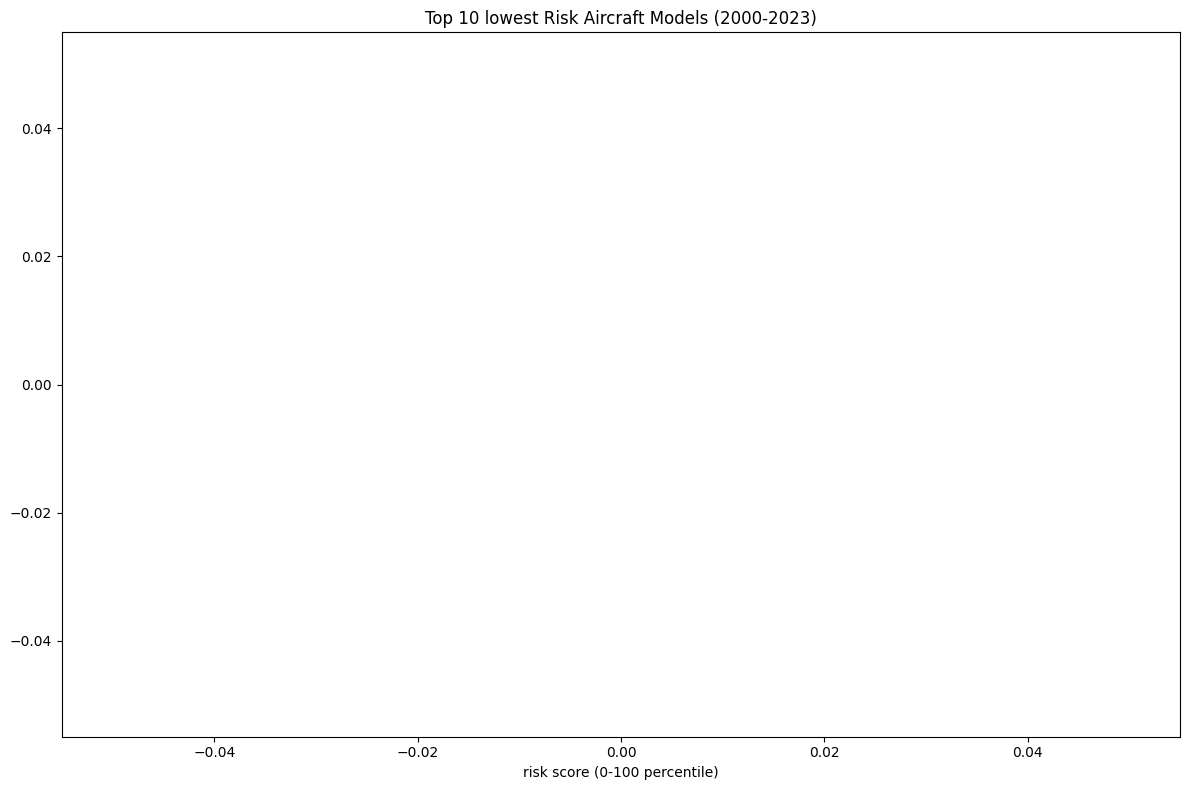

In [175]:
import matplotlib.pyplot as plt


topic = candidates.head(10)


topic['label'] = (
    topic['Aircraft_Make'] + '' +
    topic['Aircraft_Model'] + '(n =' +
    topic['incidents'].astype(str) + ')'
)

plt.figure(figsize=(12,8))

plt.barh(candidates.head(10)['Aircraft_Model'], candidates.head(10)['risk_score_pct'], color='skyblue')

plt.xlabel('risk score (0-100 percentile)')

plt.title('Top 10 lowest Risk Aircraft Models (2000-2023)')



plt.tight_layout()

plt.show()

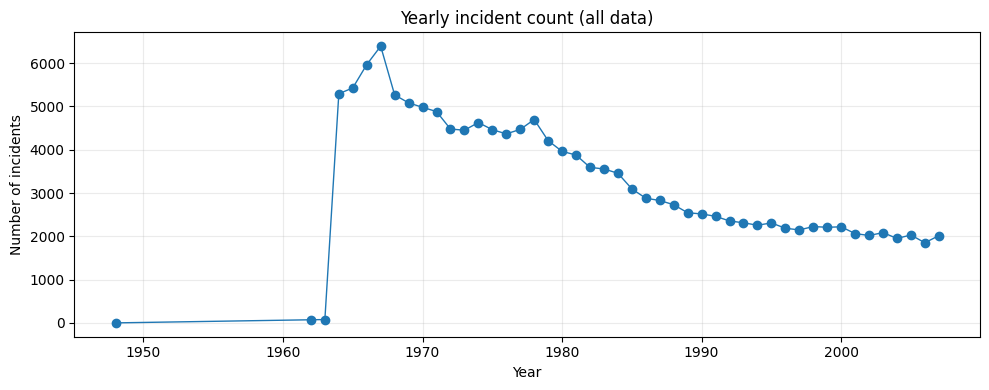

In [176]:
yearly = df.dropna(subset=['year']).groupby('year').size().sort_index()

if yearly.shape[0] == 0:

  print("No valid years found to plot. Check event_date parsing.")

else:

  plt.figure(figsize=(10,4))

  plt.plot(yearly.index, yearly.values, marker='o', linewidth=1)

  plt.xlabel('Year')

  plt.ylabel('Number of incidents')

  plt.title('Yearly incident count (all data)')

  plt.grid(alpha=0.25)

  plt.tight_layout()


  plt.show()






top makes: [' CESSNA ', ' PIPER ', ' BEECH ', ' Cessna ', ' Piper ', ' BELL ', ' BOEING ', ' MOONEY ']
subset shape: (100513, 35)
Incident risk sample:
       Make  incident_risk
0    Piper             0.0
1   Cessna             0.0
4     BELL             1.5
5    Piper             0.0
7   Cessna             0.0


<Figure size 1200x600 with 0 Axes>

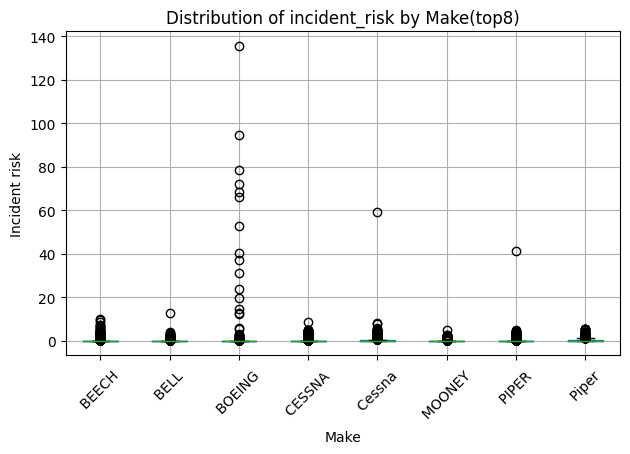

In [177]:
# Boxplot of incident_risk

top_makes_n = 8

top_makes = df['Make'].value_counts().head(top_makes_n).index.tolist()

subset = df[df['Make'].isin(top_makes)].copy()

print("top makes:", top_makes)

print("subset shape:", subset.shape)


#if incident_risk missing out non-numeric, coerce

subset['fatalities'] = pd.to_numeric(subset.get('Total Fatal Injuries', 0), errors='coerce').fillna(0)

subset['serious'] = pd.to_numeric(subset.get('Total Serious Injuries', 0), errors='coerce').fillna(0)

subset['damage_score'] = subset.get('Aircraft Damage', '').fillna(0).astype(int)

w_f, w_s, w_d = 0.5, 0.2, 0.3

subset['incident_risk'] = (
    w_f * subset['fatalities'] +
    w_s * subset['serious'] +
    w_d * subset['damage_score']
)

subset['incident_risk'] = pd.to_numeric(subset['incident_risk'], errors='coerce').fillna(0)

print("Incident risk sample:")

print(subset[['Make', 'incident_risk']].head())

plt.figure(figsize=(12,6))

subset.boxplot(column='incident_risk', by='Make', rot=45)

plt.title('Distribution of incident_risk by Make(top{})'.format(top_makes_n))

plt.suptitle('')

plt.ylabel('Incident risk')

plt.tight_layout()

plt.show()



In [178]:
print("Total unique MakeModel:", agg.shape[0])

print("Any NaN in risk_score_pct?", agg['risk_score_pct'].isnull().any())

print("Sample aggregated rows with smallest risk_score_pct:")

display(agg.sort_values('risk_score_pct').head(5))

Total unique MakeModel: 1
Any NaN in risk_score_pct? False
Sample aggregated rows with smallest risk_score_pct:


,Aircraft_Make,Aircraft_Model,incidents,total_risk_sum,mean_risk,total_fatalities,total_serious,risk_score_norm,risk_score_pct
0,<bound method StringMethods.upper of <pandas.c...,<bound method StringMethods.upper of <pandas.c...,0,0,NaN,11725.0,3596.0,0.0,0.0


In [179]:
df.to_csv('cleaned_AviationData.csv', index=False)